# Project Team ID : PTID-CDS-DEC-23-1718
# Project Code : PRCP-1005-ForestCover pred
# Project Name : Forest type cover prediction

# Problem statement
- To predict seven different cover types in four different wilderness areas of the Forest with the best accuracy.

# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset

In [3]:
df=pd.read_csv("train.csv")

In [3]:
df

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          1       2596      51      3                               258   
1          2       2590      56      2                               212   
2          3       2804     139      9                               268   
3          4       2785     155     18                               242   
4          5       2595      45      2                               153   
...      ...        ...     ...    ...                               ...   
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0                221             232            148  ...            0   
1                220             235            151  ...            0   
2                234             238            135  ...            0   
3                238             238            122  ...            0   
4                220             234            150  ...            0   
...              ...             ...            ...  ...          ...   
15115            170             251            214  ...            0   
15116            249             221             91  ...            0   
15117            250             220             83  ...            0   
15118            229             237            119  ...            0   
15119            189             244            164  ...            0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0                0            0            0            0            0   
1                0            0            0            0            0   
2                0            0            0            0            0   
3                0            0            0            0            0   
4                0            0            0            0            0   
...            ...          ...          ...          ...          ...   
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            0            0   

       Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0                0            0            0           5  
1                0            0            0           5  
2                0            0            0           2  
3                0            0            0           2  
4                0            0            0           5  
...            ...          ...          ...         ...  
15115            0           

# Basic checks

In [3]:
df.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            0   
1            220             235            151  ...            0   
2            234             238            135  ...            0   
3            238             238            122  ...            0   
4            220             234            150  ...            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           5  
1            0            0            0           5  
2            0            0            0           2  
3            0            0            0           2  
4            0            0            0           5  

[5 rows x 56 columns]

In [4]:
df.tail()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
15115            170             251            214  ...            0   
15116            249             221             91  ...            0   
15117            250             220             83  ...            0   
15118            229             237            119  ...            0   
15119            189             244            164  ...            0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            0            0   

       Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
15115            0            0            0           3  
15116            0            0            0           3  
15117            0            0            0           3  
15118            0            0            0           3  
15119            0            0            0           3  

[5 rows x 56 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [6]:
df.describe(include="all")

Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  ...   Soil_Type32   Soil_Type33   Soil_Type34  \
count   15120.000000  ...  15120.000000  15120.000000  15120.000000   
mean      135.091997  ...      0.045635      0.040741      0.001455   
std        45.895189  ...      0.208699      0.197696      0.038118   
min         0.000000  ...      0.000000      0.000000      0.000000   
25%       106.000000  ...      0.000000      0.000000      0.000000   
50%       138.000000  ...      0.000000      0.000000      0.000000   
75%       167.000000  ...      0.000000      0.000000      0.000000   
max       248.000000  ...      1.000000      1.000000      1.000000   

        Soil_Type35   Soil_Type36   Soil_Type37   Soil_Type38   Soil_Type39  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.006746      0.000661      0.002249      0.048148      0.043452   
std        0.081859      0.025710      0.047368      0.214086      0.203880   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        Soil_Type40    Cover_Type  
count  15120.000000  15120.000000  
mean       0.030357      4.000000  
std        0.171574      2.000066  
min        0.000000      1.000000  
25%        0.000000      2.000000  
50%        0.000000      4.000000  
75%        0.000000      6.000000  
max        1.000000      7.000000  

[8 rows x 56 columns]

In [4]:
df.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


# Checking the distribution of data

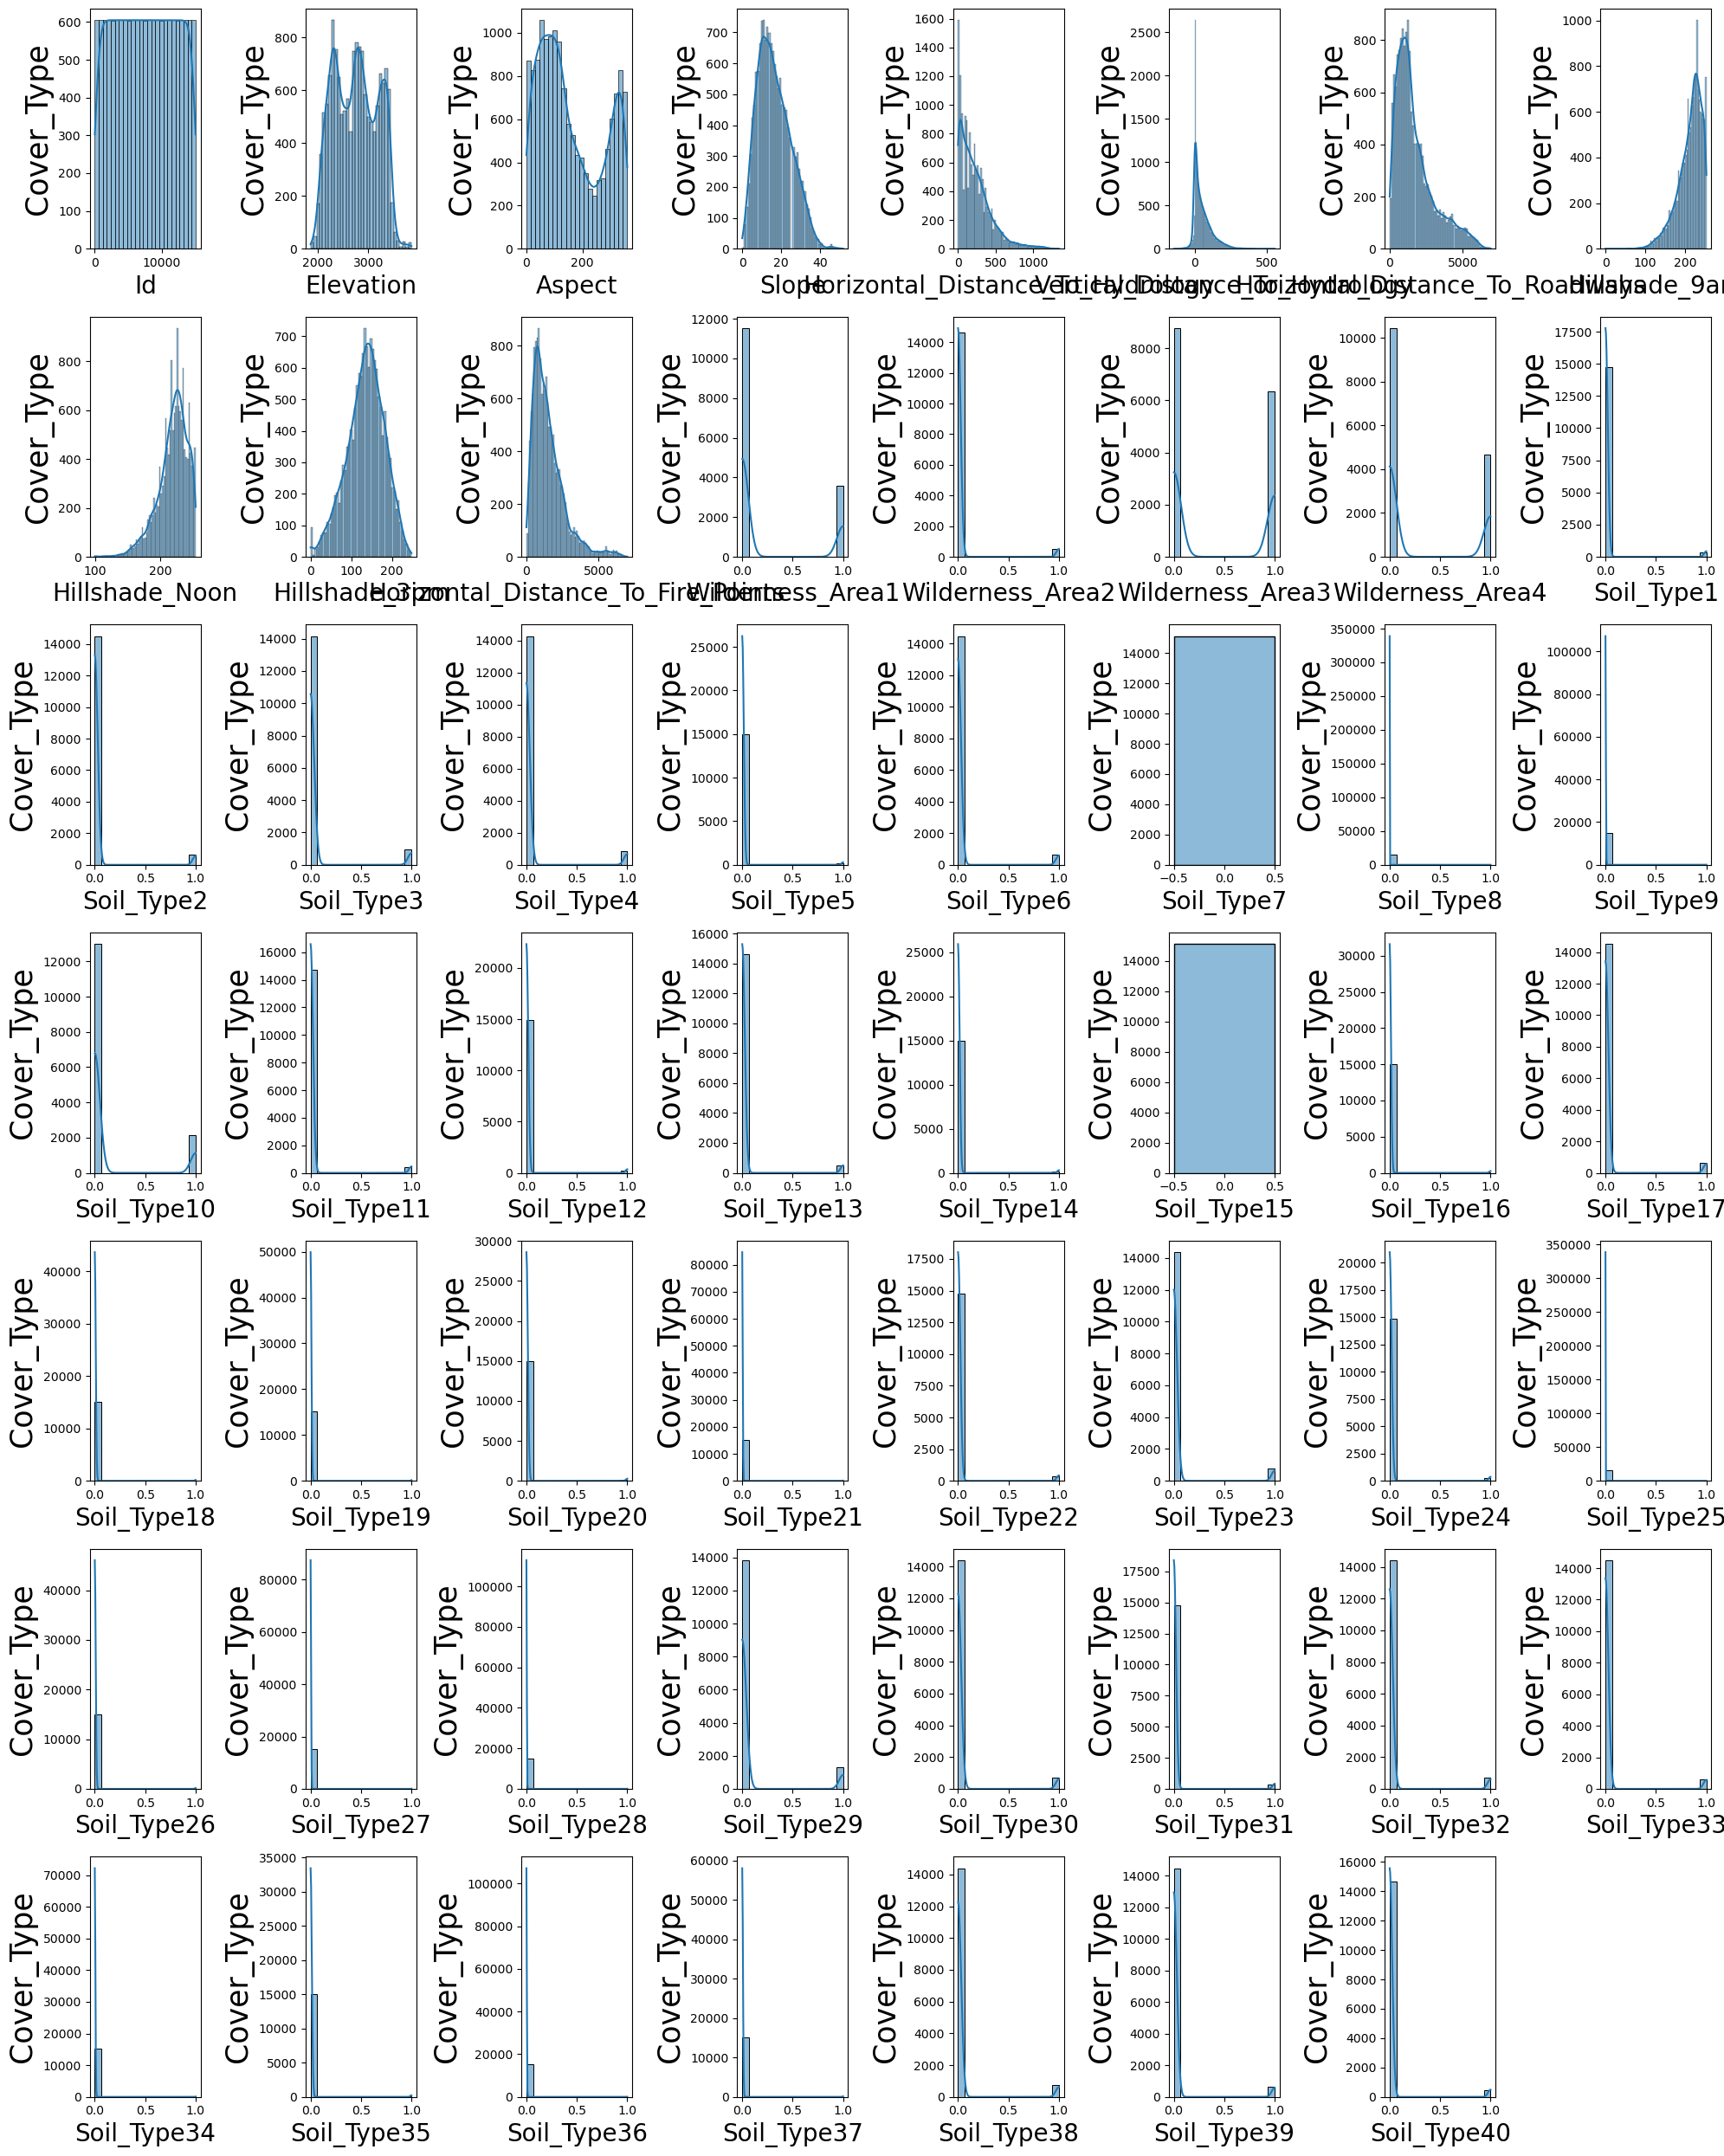

In [5]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<56:
        ax=plt.subplot(7,8,plotnumber)
        sns.histplot(x=df[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel("Cover_Type",fontsize=25)
    plotnumber+=1
plt.tight_layout()    

# Exploratory data analysis

### Cover_type names:
- Spruce/Fir.
- Lodgepole Pine.
- Ponderosa Pine.
- Cottonwood/Willow.
- Aspen.
- Douglas-fir.
- Krummholz.

## univariate

In [20]:
!pip install sweetviz

In [21]:
import sweetviz as sv
my_report=sv.analyze(df)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### insights
- Above 99% soil_type34,35,36 are absent
- Above 15% of elevations are at 2300
- Above 15% of aspects are at 110
- Above 20% f slope are at 14.0
- At 42% of horizantal_distance_to_hydrology are 150
- The wilderness_area1 absent value is 76% and present value is 24%
- The soil_type7 is  totally absent 
- The soil_type10 is absent 86% and present 14%

## Bivariate

<Axes: xlabel='Soil_Type3', ylabel='Count'>

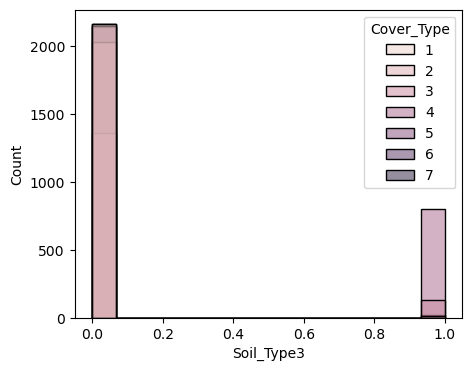

In [15]:
plt.figure(figsize=(5,4))
sns.histplot(data=df,x='Soil_Type3',hue='Cover_Type')
#insight: 900 Cottonwood/Willow is present in soil_type3. 

<Axes: xlabel='Soil_Type1', ylabel='count'>

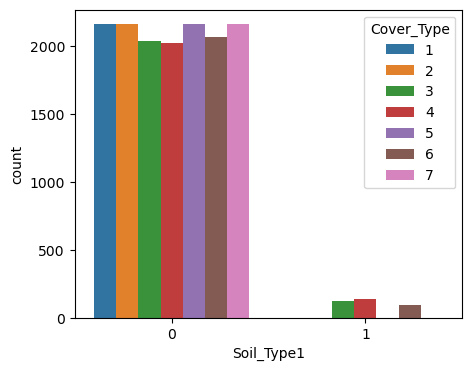

In [16]:
plt.figure(figsize=(5,4))
sns.countplot(data=df,x='Soil_Type1',hue='Cover_Type')
#insights : Spruce/Fir,Lodgepole Pine,Aspen,Krummholz  types are absent  and Ponderosa Pine,Cottonwood/Willow,Douglas-fir are present at soil_type1.

<Axes: xlabel='Elevation', ylabel='Count'>

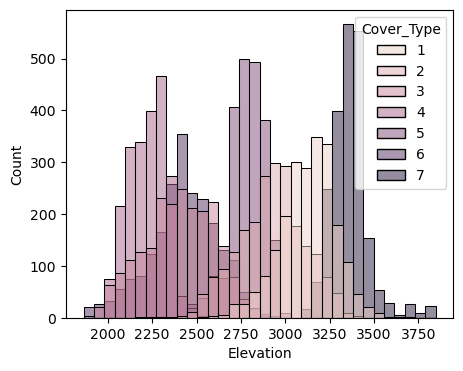

In [17]:
plt.figure(figsize=(5,4))
sns.histplot(data=df,x='Elevation',hue='Cover_Type')
#insights:At 3300,Elevations are hight at Krummholz.

<Axes: xlabel='Aspect', ylabel='Count'>

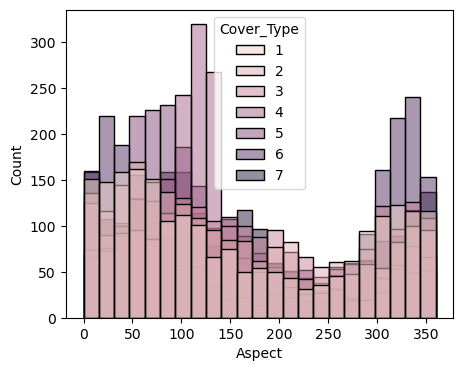

In [18]:
plt.figure(figsize=(5,4))
sns.histplot(data=df,x='Aspect',hue='Cover_Type')
#insights: At the count of 300,125 aspects are Cottonwood/Willow 

## Multivariate

<Axes: xlabel='Soil_Type3', ylabel='Soil_Type2'>

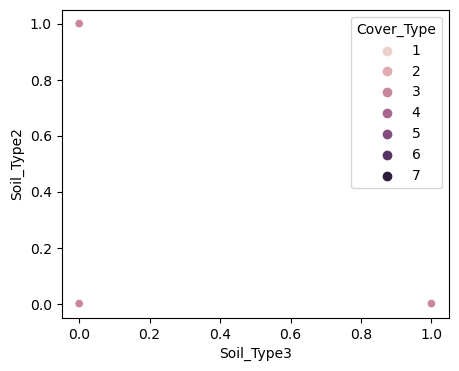

In [7]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df,x='Soil_Type3',y='Soil_Type2',hue='Cover_Type')
#insights: Only Ponderosa Pine is present in comparision of soil_type2 and soil_type3

<Axes: xlabel='Aspect', ylabel='Elevation'>

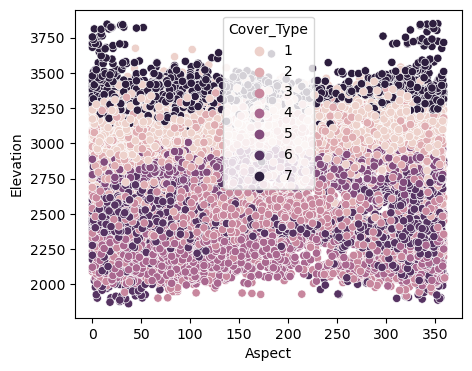

In [19]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df,x='Aspect',y='Elevation',hue='Cover_Type')
#insights: Krummholz is present at huge amount in elevations and aspect

<Axes: xlabel='Hillshade_3pm', ylabel='Hillshade_9am'>

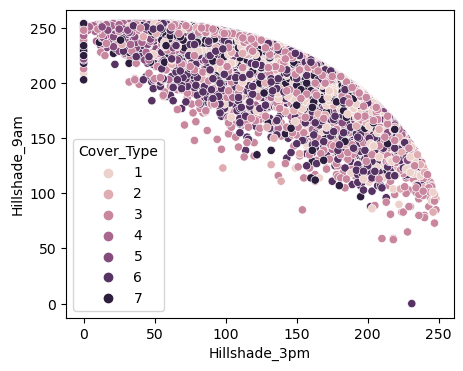

In [24]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df,x='Hillshade_3pm',y='Hillshade_9am',hue='Cover_Type')
#insights: The shade had been in curve share,so it represents when hillshade_3pm is high then hillshape_9am is low,so they are inversly proportional

# Data preprocessing

In [7]:
num=df[["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways",
              "Horizontal_Distance_To_Fire_Points"]]

In [8]:
num

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0           2596      51      3                               258   
1           2590      56      2                               212   
2           2804     139      9                               268   
3           2785     155     18                               242   
4           2595      45      2                               153   
...          ...     ...    ...                               ...   
15115       2607     243     23                               258   
15116       2603     121     19                               633   
15117       2492     134     25                               365   
15118       2487     167     28                               218   
15119       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Horizontal_Distance_To_Fire_Points  
0                                    6279  
1                                    6225  
2                                    6121  
3                                    6211  
4                                    6172  
...                                   ...  
15115                                1282  
15116                                1325  
15117                                1187  
15118                                 932  
15119                                 914  

[15120 rows x 7 columns]

In [10]:
cont=df.drop(["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology"
              ,"Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways",
              "Horizontal_Distance_To_Fire_Points"],axis=1)

In [11]:
cont

Id  Hillshade_9am  Hillshade_Noon  Hillshade_3pm  Wilderness_Area1  \
0          1            221             232            148                 1   
1          2            220             235            151                 1   
2          3            234             238            135                 1   
3          4            238             238            122                 1   
4          5            220             234            150                 1   
...      ...            ...             ...            ...               ...   
15115  15116            170             251            214                 0   
15116  15117            249             221             91                 0   
15117  15118            250             220             83                 0   
15118  15119            229             237            119                 0   
15119  15120            189             244            164                 0   

       Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  Soil_Type1  \
0                     0                 0                 0           0   
1                     0                 0                 0           0   
2                     0                 0                 0           0   
3                     0                 0                 0           0   
4                     0                 0                 0           0   
...                 ...               ...               ...         ...   
15115                 0                 1                 0           0   
15116                 0                 1                 0           0   
15117                 0                 1                 0           0   
15118                 0                 1                 0           0   
15119                 0                 1                 0           0   

       Soil_Type2  ...  Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  \
0               0  ...            0            0            0            0   
1               0  ...            0            0            0            0   
2               0  ...            0            0            0            0   
3               0  ...            0            0            0            0   
4               0  ...            0            0            0            0   
...           ...  ...          ...          ...          ...          ...   
15115           0  ...            0            0            0            0   
15116           0  ...            0            0            0            0   
15117           0  ...            0            0            0            0   
15118           0  ...            0            0            0            0   
15119           1  ...            0            0            0            0   

       Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  \
0                0            0            0            0            0   
1                0            0            0            0            0   
2                0            0            0            0            0   
3                0            0            0            0            0   
4                0            0            0            0            0   
...            ...          ...          ...          ...          ...   
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            0            0   

       Cover_Type  
0               5  
1               5  
2               2  
3               2  
4               5  
...           ...  
15115           3  
15116           3  
15117           3  
15118           3  
15119           3  

[15120 rows x 49 columns]

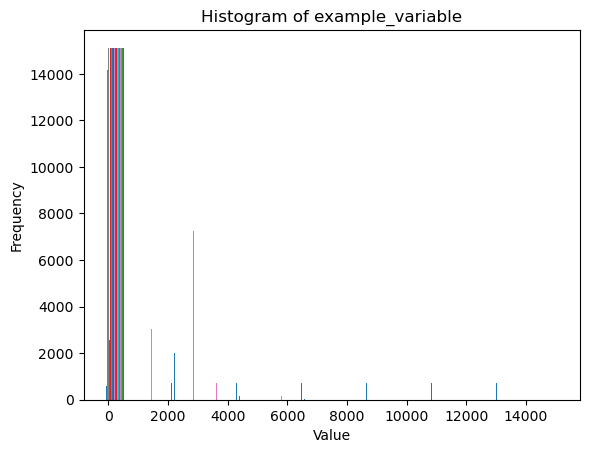

In [14]:
plt.hist(df, bins='auto')
plt.title('Histogram of example_variable')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

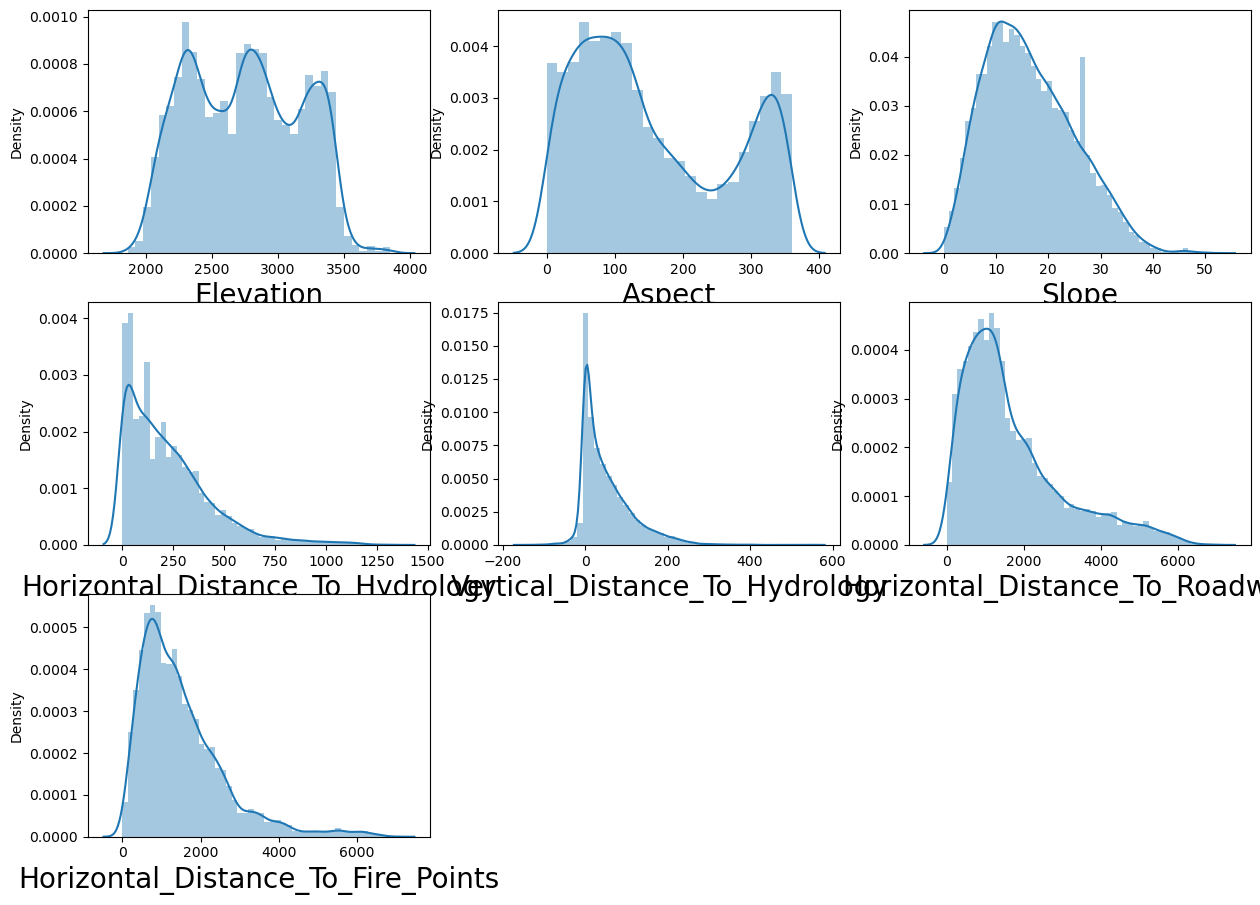

In [12]:
#outlier detection
plt.figure(figsize=(15,60),facecolor='white')
plotnumber=1

for column in num:
    ax=plt.subplot(16,3,plotnumber)
    sns.distplot(num[column])
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Feature selection

<Axes: >

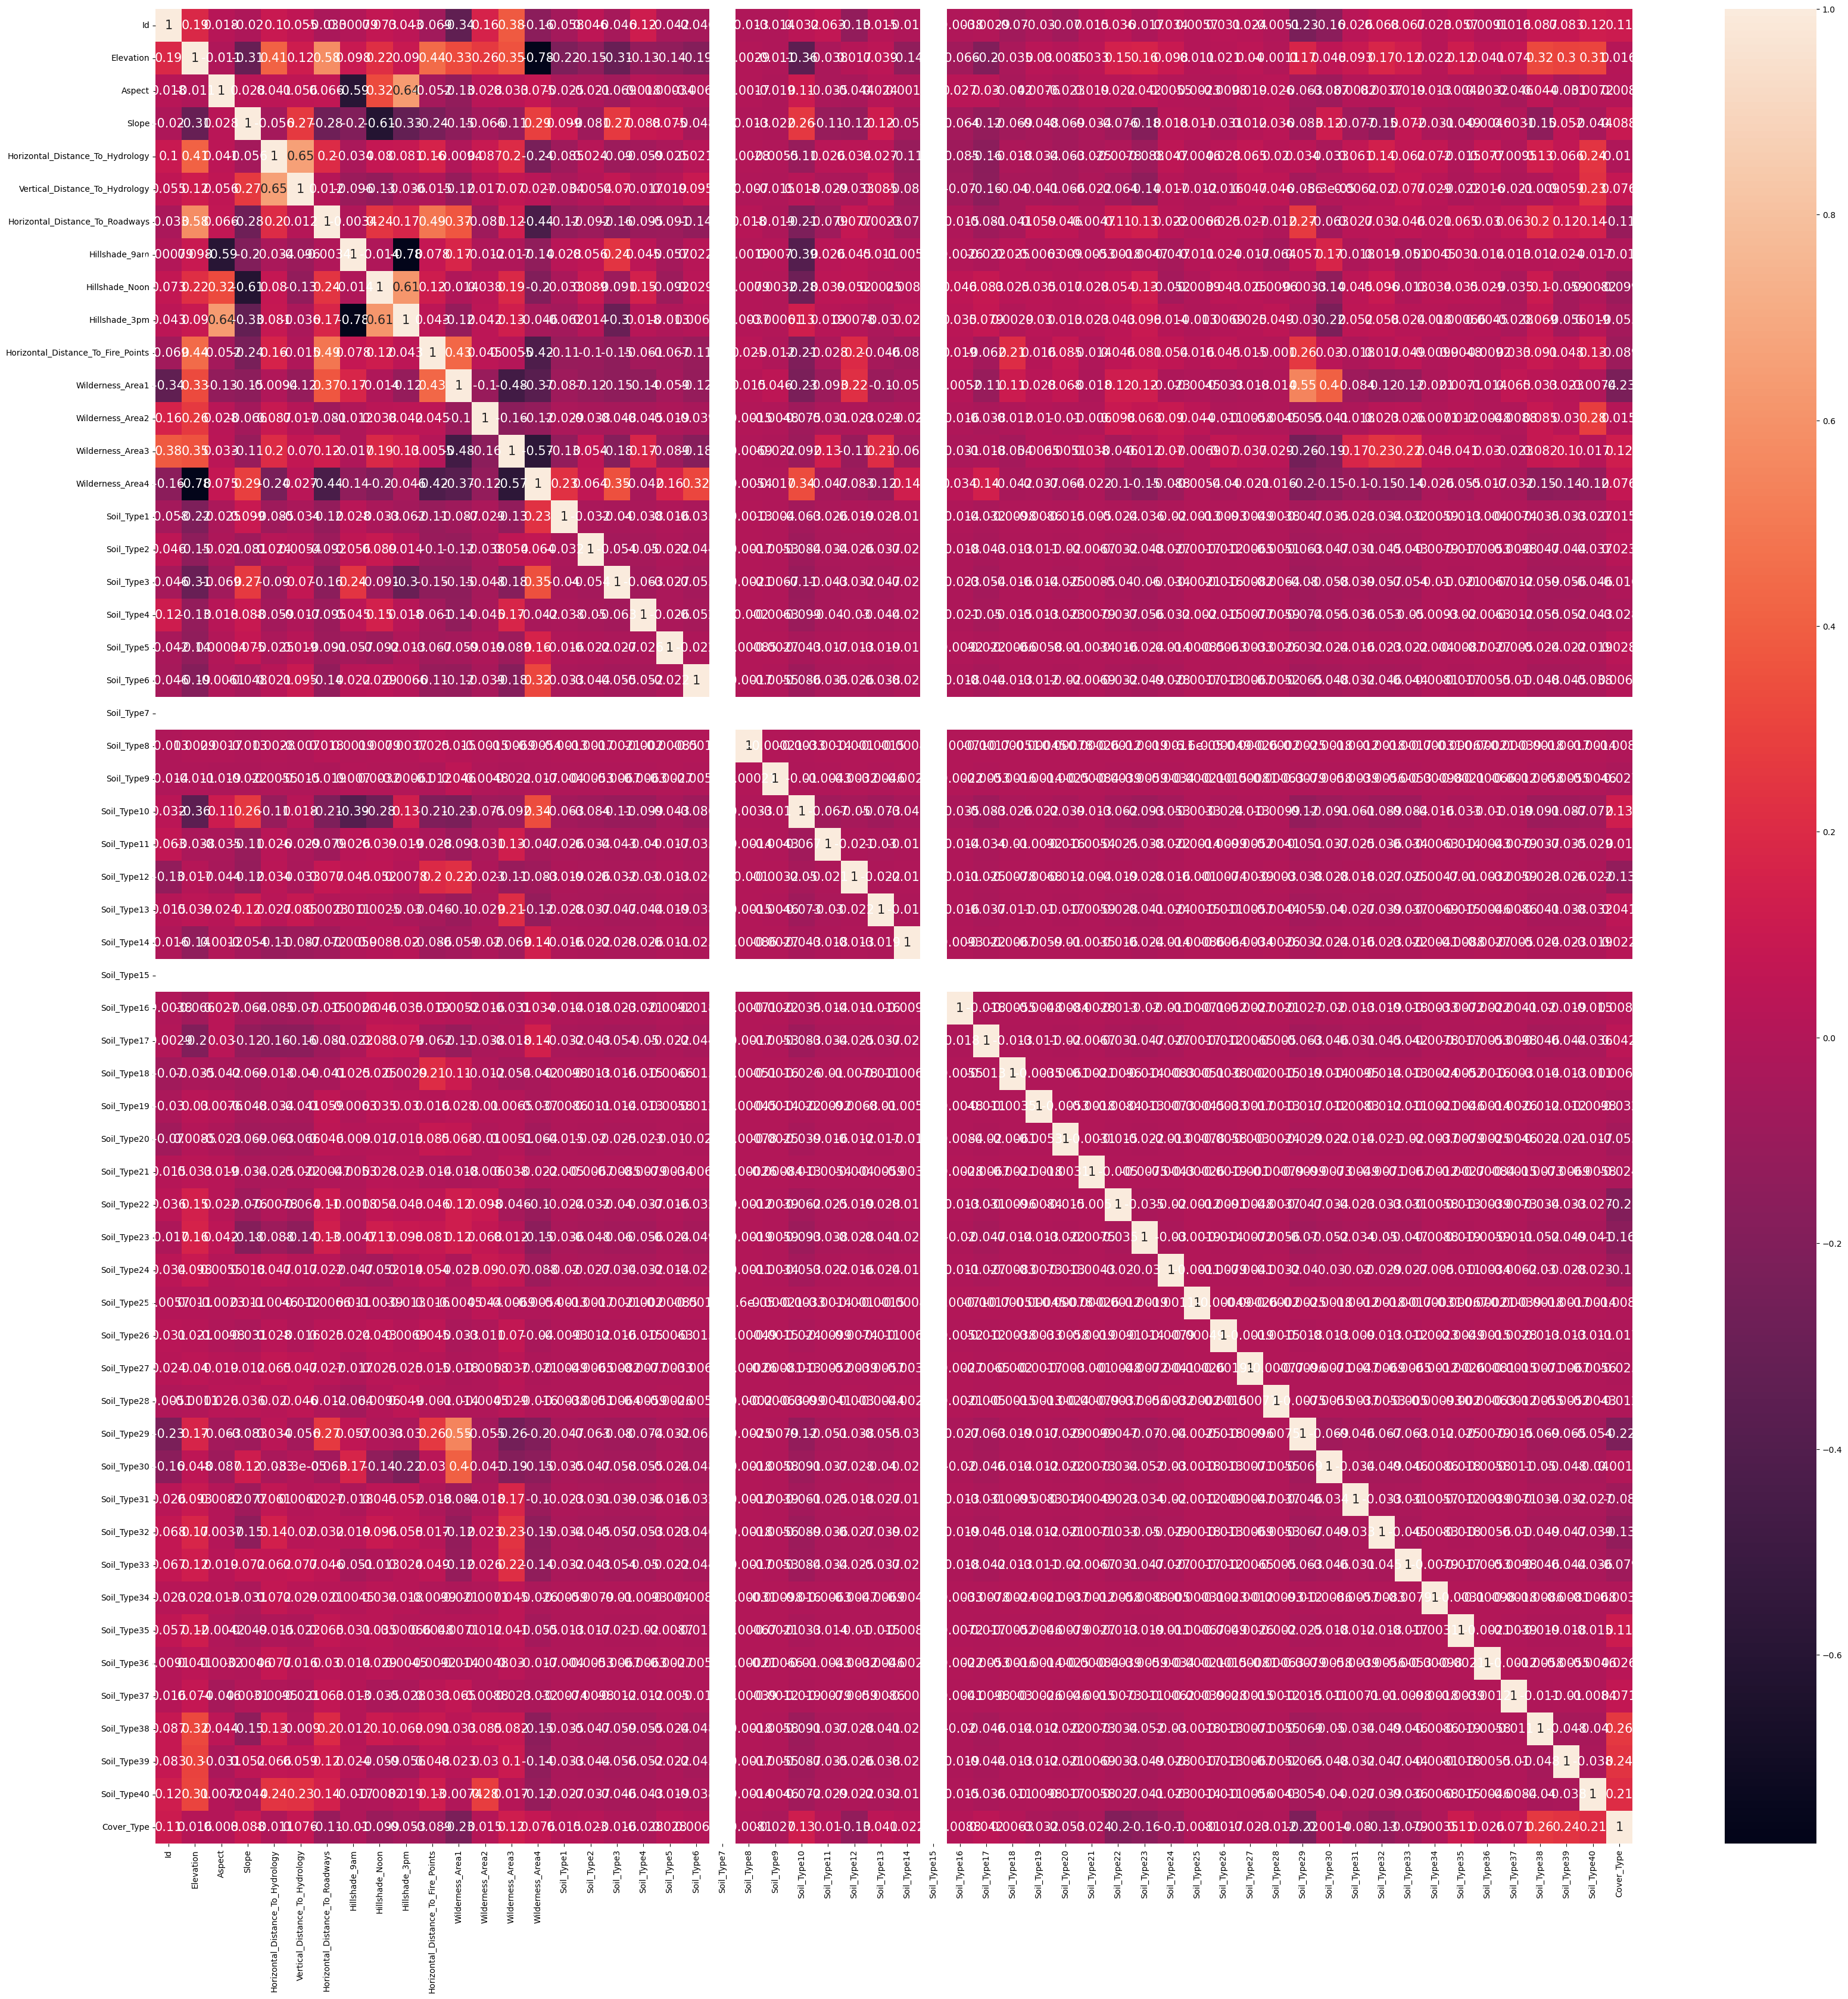

In [4]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':15})

In [5]:
def correlation(df,threshold):
    col_corr=set()
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr  

# Target and predictor seperation

In [6]:
X = df.drop(['Cover_Type'],axis=1)
y = df['Cover_Type']

# Train test split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=100)

In [8]:
corr_feature=correlation(X_train,0.7)
len(set(corr_feature))

2

In [9]:
corr_feature

{'Hillshade_3pm', 'Wilderness_Area4'}

In [10]:
X_train.drop(corr_feature,axis=1)
X_test.drop(corr_feature,axis=1)

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
7777    7778       3370      16     18                               457   
8689    8690       2794     163      6                                30   
14825  14826       3218     315     13                                 0   
4925    4926       2388     310     25                               361   
10184  10185       3408     124     17                               924   
...      ...        ...     ...    ...                               ...   
1321    1322       3245      45      3                               564   
10023  10024       3225     358     14                               875   
10841  10842       2424     194     12                                 0   
4465    4466       2888     328     12                                30   
1812    1813       2693      78     29                                67   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
7777                              131                             3247   
8689                               -2                             1909   
14825                               0                             4298   
4925                              161                              886   
10184                             198                              800   
...                               ...                              ...   
1321                               66                             4387   
10023                              22                             1632   
10841                               0                             1110   
4465                                8                             1749   
1812                               25                               95   

       Hillshade_9am  Hillshade_Noon  Horizontal_Distance_To_Fire_Points  ...  \
7777             202             201                                2138  ...   
8689             226             242                                2322  ...   
14825            184             229                                1380  ...   
4925             145             214                                 201  ...   
10184            246             226                                 127  ...   
...              ...             ...                                 ...  ...   
1321             220             233                                2650  ...   
10023            198             214                                 953  ...   
10841            218             250                                1154  ...   
4465             191             226                                1489  ...   
1812             242             174                                1524  ...   

       Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  \
7777             0            0            0            0            0   
8689             0            0            0            0            0   
14825            0            0            0            0            0   
4925             0            0            0            0            0   
10184            0            0            0            0            0   
...            ...          ...          ...          ...          ...   
1321             0            0            0            0            0   
10023            1            0            0            0            0   
10841            0            0            0            0            0   
4465             0            0            0            0            0   
1812             0            0            0            0            0   

       Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  
7777             0            0            0            1            0  
8689             0            0            0            0            0  
14825            0            0            0            0            0  
4925             0            0            0          

In [11]:
print("X_train.shape",X_train.shape)
print("y_train.shape",y_train.shape)
print("X_test.shape",X_test.shape)
print("y_test.shape",y_test.shape)

X_train.shape (12096, 55)
y_train.shape (12096,)
X_test.shape (3024, 55)
y_test.shape (3024,)


# Model for random forest classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
y_pred =model.predict(X_test)
y_pred

array([7, 5, 1, ..., 6, 5, 5], dtype=int64)

In [36]:
len(y_pred)

3024

In [35]:
from sklearn.metrics import accuracy_score
print("accuracy_score is: ",accuracy_score(y_test, y_pred))

accuracy_score is:  0.8657407407407407


# Model for logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [21]:
y_pred=model.predict(X_test)
y_pred

array([7, 4, 7, ..., 4, 4, 5], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score

In [28]:
print("accuracy_score is :",accuracy_score(y_pred,y_test))

accuracy_score is : 0.38227513227513227


# Model Comparison Report

In [ ]:
""" We have used the random forest classifier and logistic regression machine learning algorithms to evaluate the problem,
    after the evaluation we conclude that random forest classifier is the best model than the logistic regression,
    for random forest we got an accuracy of 0.86 and for logistic regression it's just 0.38, 
    so as per the accuracy we conclude that random forest classifier is the best model."""

# Report on Challenges faced

In [ ]:
""" We don't find any challenges on this forest_cover_type."""
""" The technique we use for this problem is supervised , we used matplot and seaborn for visualization,these techniques 
    play a key role for performing many like data distribution,outlier detection and so on. """